In [ ]:
NAME - Pranali Darekar 
TASK 1 - Prediction using Supervised ML


#Importing the necessary libraries for evaluation purposes
import numpy as np
import pandas as pd
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
df  = pd.read_csv("http://bit.ly/w-data") 
df.head(25)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [3]:
#Summarizing the various observations made form the dataset, using the describe() function 
df.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000


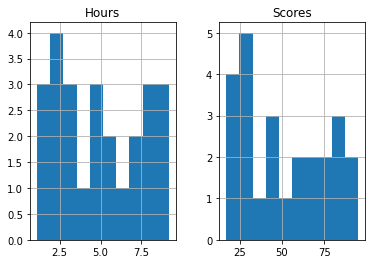

In [4]:
#A graphical view of value distribution of each of hte specified attributes(Hours and Scores)
viz  = df[['Hours','Scores']]
viz.hist()
plt.show()

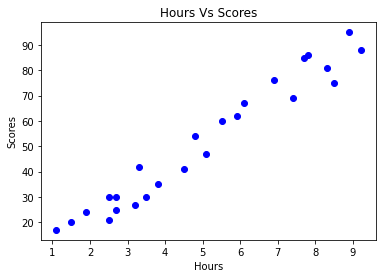

In [5]:
#Visualizing the Dataset 
plt.scatter(df.Hours, df.Scores,  color='blue')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.title("Hours Vs Scores")
plt.show()


In [6]:
#Distributing the Dataset using Training and Testing Arrays
mask = np.random.rand(len(df)) < 0.8
train = df[mask]  #to select hte 80 percent data as training set 
test = df[~mask]  # to select the rest of the data as the test set


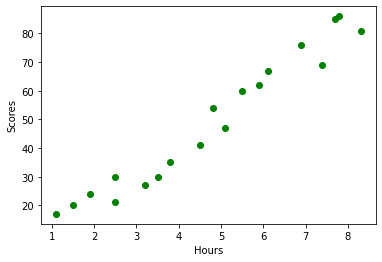

In [7]:
plt.scatter(train.Hours, train.Scores,  color='green')
plt.xlabel("Hours")
plt.ylabel("Scores")
plt.show()

In [8]:
#Visualizing the coefficients and the intercept values 
# Training the linear regression model
from sklearn import linear_model
regressor = linear_model.LinearRegression()
train_x = np.asanyarray(train[['Hours']])
train_y = np.asanyarray(train[['Scores']])
regressor.fit (train_x, train_y)
# The coefficients
print ('Value of Coefficients: ', regressor.coef_)
print ('Value of Intercept: ',regressor.intercept_)

Value of Coefficients:  [[10.22031485]]
Value of Intercept:  [0.64061388]


Text(0, 0.5, 'Scores')

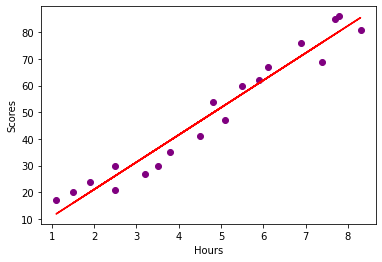

In [9]:
#Visualizing the Data
plt.scatter(train.Hours, train.Scores,  color='purple')
plt.plot(train_x, regressor.coef_[0][0]*train_x + regressor.intercept_[0], '-r')
plt.xlabel("Hours")
plt.ylabel("Scores")


In [10]:
#Checking the Dataset Accuracy by implementing various Analysis methods 
from sklearn.metrics import r2_score

test_x = np.asanyarray(test[['Hours']])
test_y = np.asanyarray(test[['Scores']])
test_y_ = regressor.predict(test_x)

print("Mean absolute error: %.2f" % np.mean(np.absolute(test_y_ - test_y)))
print("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print("R2-score: %.2f" % r2_score(test_y , test_y_) )


Mean absolute error: 5.87
Residual sum of squares (MSE): 47.40
R2-score: 0.94


In [11]:
# Comparing Actual vs Predicted set of Values
df = pd.DataFrame({'Actual': [test_y], 'Predicted': [test_y_]})
print(df)

                                 Actual  \
0  [[75], [88], [25], [42], [95], [30]]   

                                           Predicted  
0  [[87.51329008780951], [94.66751048176567], [28...  


In [12]:
#Testing as per the mentioned conditions in the given question sample 
hrs= np.array([9.25])

n_hrs = hrs.reshape(-1, 1)
own_pred = regressor.predict(n_hrs)
print("No of Hours = {}".format(n_hrs))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = [[9.25]]
Predicted Score = [95.17852622]
